**TOPIC**: HEALTH INSURANCE IN THE SOCIETY

**BACKGROUND STUDY**: Insurance as we know is a contract between the Insurer and the Client. It is a form of agreement between the two parties where the Clients pay a certain amount of money called the premium to cover the cost of the insurance. The Insurance company has the policy limit which is maximum amount of money that the Insurance company will pay to cover the loss of any item, life, goods, etc. The last part of Insurance is the deductible where a client pays a specific amount from his pocket to Insurance company.

**TYPES OF INSURANCE**:
- LIFE INSURANCE
- RANSOM INSURANCE
- HEALTH INSURANCE
- VEHICLE INSURANCE
- FIRE INSURANCE

**AIM AND OBJECTIVES**:

**AIM**:
- To understand the data and perform exploratory data analysis on the data to understand the data better and see the relationship between the variables.

**OBJECTIVES**:
- DATA CLEANING
- DATA COLLECTION
- DATA VISUALIZATION
- DRAWING HYPOTHESIS AND DERIVING CONCLUSION FROM THE HYPOTHESIS

**METHOLOGY**

The method that will be used in this study is Exploratory data analysis. 

**What is meant by exploratory data analysis?**
Exploratory Data Analysis (EDA) is an analysis approach that identifies general patterns in the data. These patterns include outliers and features of the data that might be unexpected.EDA is an important first step in any data analysis.
The four types of EDA are univariate non-graphical, multivariate non- graphical, univariate graphical, and multivariate graphical.

The programming language to be used in analysing the data is python.The libraries to be used are numpy,pandas,matplotlib and seaborn.

Data analysis.

Importing all the necessary libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading the data

In [9]:
filename = r"C:\Users\HP PC\Desktop\insurance.csv"
df = pd.read_csv(filename)

Checking for missing values in the dataset"

In [10]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There are no missing values in the dataset.

Checking for duplicate values in the data

In [12]:
df.duplicated().sum()

1

From the above, it is observed that there is a duplicate value present in the data.

Removing the duplicate value

In [13]:
df = df.drop_duplicates()

Dropping columns that are not needed for the analysis

In [14]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


From the above dataset, there's no column that needs to be dropped. All the columns are needed for the analysis.

#### Get the average charges for each gender so as to determine who pays the highest and the lowest.



In [15]:
df.groupby(by = "sex")[["sex","charges"]].mean()

,charges
sex,
female,12569.578844
male,13974.998864


From the above analysis, we can deduce that the male gender pays the highest charges while the female gender pays the least.

#### Checking for the gender that smokes the most

In [20]:
df[ df['smoker'] == 'yes' ].groupby(by = 'sex')['smoker'].count()

sex
female    115
male      159
Name: smoker, dtype: int64

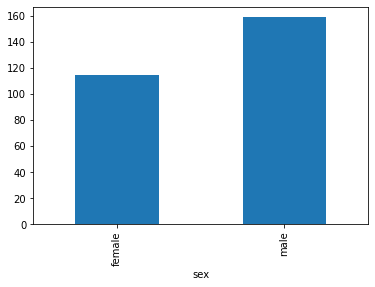

In [21]:
df[ df['smoker'] == 'yes' ].groupby(by = 'sex')['smoker'].count().plot(kind = 'bar')
plt.show()

From the above analysis, it is observed that men smokes more than women

#### Checking if age affects the amount of charges you pay

Grouping the age into groups:

In [35]:
def age_groups(x):
    if x <= 64 and x >= 55:
        return "old"
    elif x <= 54 and x >= 35:
        return "Adult"
    elif x <= 34 and x >= 18:
        return "Youth"
    else:
        return None
    
df["age_category"] = df["age"].map(age_groups)

In [38]:
df.groupby(by = "age_category")[["age_category", "charges"]].mean()

,charges
age_category,
Adult,14561.172141
Youth,9687.977043
old,18513.276227


From the above analysis, it can be deduced that there's a relationship between age and the amount of charges you pay. The older you get, the higher the charges. 

In [37]:
df

,age,sex,bmi,children,smoker,region,charges,age_category
0,19,female,27.900,0,yes,southwest,16884.92400,Youth
1,18,male,33.770,1,no,southeast,1725.55230,Youth
2,28,male,33.000,3,no,southeast,4449.46200,Youth
3,33,male,22.705,0,no,northwest,21984.47061,Youth
4,32,male,28.880,0,no,northwest,3866.85520,Youth
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,Adult
1334,18,female,31.920,0,no,northeast,2205.98080,Youth
1335,18,female,36.850,0,no,southeast,1629.83350,Youth
1336,21,female,25.800,0,no,southwest,2007.94500,Youth


Are people with high bmi mostly smokers?

In [39]:
df.head()

,age,sex,bmi,children,smoker,region,charges,age_category
0,19,female,27.900,0,yes,southwest,16884.92400,Youth
1,18,male,33.770,1,no,southeast,1725.55230,Youth
2,28,male,33.000,3,no,southeast,4449.46200,Youth
3,33,male,22.705,0,no,northwest,21984.47061,Youth
4,32,male,28.880,0,no,northwest,3866.85520,Youth


In [41]:
df["bmi"].nunique()

548

In [46]:
df.loc[df["bmi"]>=30.0].groupby(by = "smoker")[["smoker","bmi"]].count()


,smoker,bmi
smoker,,
no,561,561
yes,145,145


From the above analysis, it can be deduced that people with high bmi are not mostly smokers

#### Checking for the regions that have the highest smokers

In [49]:
df[ df['smoker'] == 'yes' ].groupby(by='region')['smoker'].value_counts()

region     smoker
northeast  yes       67
northwest  yes       58
southeast  yes       91
southwest  yes       58
Name: smoker, dtype: int64

From the above analysis, it can be deduced that south east region has the highest number of smokers.

#### Checking for the correlation between age and smokers

In [59]:
n_s = df[ df["smoker"] == "yes" ].groupby(by = "age_category")[["age_category","smoker"]].count()
n_s

,age_category,smoker
age_category,,
Adult,116,116
Youth,116,116
old,42,42


From our analysis, the correlation between smokers and age cannot be concluded yet until extra data is recieved

#### Checking the age rank that pays the highest charges

In [65]:
df.groupby(by = "age_category")["charges"].mean()

age_category
Adult    14561.172141
Youth     9687.977043
old      18513.276227
Name: charges, dtype: float64

From the analysis, the old category pays the highest amount of charges

### Checking if the number of children affect the charges, if so, is it positive or negative

In [ ]:
df[ df["children"] > 0 ]

In [69]:
df.children.unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)